In [1]:
from petl import look, fromdb,fromjson,fromdicts,unpackdict,cut, todb, rename, tocsv
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from plotly.subplots import make_subplots
from shapely.geometry import Point
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import psycopg2 as pg
import requests
import urllib.request, json
import geopandas as gpd
%matplotlib inline

### Data source

We'll use /users end point from the given api url

In [2]:
jsonurl = urllib.request.urlopen("https://jsonplaceholder.typicode.com/users")
data = json.loads(jsonurl.read())
data

[{'id': 1,
  'name': 'Leanne Graham',
  'username': 'Bret',
  'email': 'Sincere@april.biz',
  'address': {'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'city': 'Gwenborough',
   'zipcode': '92998-3874',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'}},
  'phone': '1-770-736-8031 x56442',
  'website': 'hildegard.org',
  'company': {'name': 'Romaguera-Crona',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'bs': 'harness real-time e-markets'}},
 {'id': 2,
  'name': 'Ervin Howell',
  'username': 'Antonette',
  'email': 'Shanna@melissa.tv',
  'address': {'street': 'Victor Plains',
   'suite': 'Suite 879',
   'city': 'Wisokyburgh',
   'zipcode': '90566-7771',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'}},
  'phone': '010-692-6593 x09125',
  'website': 'anastasia.net',
  'company': {'name': 'Deckow-Crist',
   'catchPhrase': 'Proactive didactic contingency',
   'bs': 'synergize scalable supply-chains'}},
 {'id': 3,
  'name': 'Clementine Bauch',
  'username': 'Samantha

# ETL program

### Extract
data is loaded as a dict. We'll extract it into users_table using petl's fromdicts() method <br/>

##### Notice nested dicts in address and company


In [3]:


#Extract

users_table = fromdicts(data)
users_table

id,name,username,email,address,phone,website,company
1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}"
2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 879', 'city': 'Wisokyburgh', 'zipcode': '90566-7771', 'geo': {'lat': '-43.9509', 'lng': '-34.4618'}}",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proactive didactic contingency', 'bs': 'synergize scalable supply-chains'}"
3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suite 847', 'city': 'McKenziehaven', 'zipcode': '59590-4157', 'geo': {'lat': '-68.6102', 'lng': '-47.0653'}}",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': 'Face to face bifurcated interface', 'bs': 'e-enable strategic applications'}"
4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692', 'city': 'South Elvis', 'zipcode': '53919-4257', 'geo': {'lat': '29.4572', 'lng': '-164.2990'}}",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Multi-tiered zero tolerance productivity', 'bs': 'transition cutting-edge web services'}"
5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351', 'city': 'Roscoeview', 'zipcode': '33263', 'geo': {'lat': '-31.8129', 'lng': '62.5342'}}",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-centric fault-tolerant solution', 'bs': 'revolutionize end-to-end systems'}"


### Transform

Since address and geo are nested dictionaries we'll unpack them using petl's unpackdict() method <br/>
We'll also remove company column since we are not interested in it using petl's cut() method <br/>

In [4]:
users_table = unpackdict(users_table, 'address')
users_table = unpackdict(users_table, 'geo')

#select a few columns
users_table = cut(users_table, 'id', 'name','username','email','phone','city','street','suite','lat','lng')

#rename column headers
users_table = rename(users_table, {'name':'Name','username':'Username','email':'Email','phone':'Phone','city':'City','street':'Street','suite':'Suite','lat':'Latitude', 'lng':'Longitude'})

users_table

id,Name,Username,Email,Phone,City,Street,Suite,Latitude,Longitude
1,Leanne Graham,Bret,Sincere@april.biz,1-770-736-8031 x56442,Gwenborough,Kulas Light,Apt. 556,-37.3159,81.1496
2,Ervin Howell,Antonette,Shanna@melissa.tv,010-692-6593 x09125,Wisokyburgh,Victor Plains,Suite 879,-43.9509,-34.4618
3,Clementine Bauch,Samantha,Nathan@yesenia.net,1-463-123-4447,McKenziehaven,Douglas Extension,Suite 847,-68.6102,-47.0653
4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,493-170-9623 x156,South Elvis,Hoeger Mall,Apt. 692,29.4572,-164.2990
5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,(254)954-1289,Roscoeview,Skiles Walks,Suite 351,-31.8129,62.5342


### Load
We'll create and load the table to a users.csv file

In [5]:
tocsv(users_table, 'users.csv')

## Exploratory Analysis

Let's visualize our data from where our users are coming from <br/>

for more on data exploration kindly check out [my blog where I explore the population dataset](https://medium.com/@elijate/data-science-with-python-2-international-migration-to-the-usa-179539bb5cd6)


In [6]:
users_dataFrame = pd.read_csv('users.csv')
users_dataFrame

,id,Name,Username,Email,Phone,City,Street,Suite,Latitude,Longitude
0,1,Leanne Graham,Bret,Sincere@april.biz,1-770-736-8031 x56442,Gwenborough,Kulas Light,Apt. 556,-37.3159,81.1496
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,010-692-6593 x09125,Wisokyburgh,Victor Plains,Suite 879,-43.9509,-34.4618
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,1-463-123-4447,McKenziehaven,Douglas Extension,Suite 847,-68.6102,-47.0653
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,493-170-9623 x156,South Elvis,Hoeger Mall,Apt. 692,29.4572,-164.2990
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,(254)954-1289,Roscoeview,Skiles Walks,Suite 351,-31.8129,62.5342
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,1-477-935-8478 x6430,South Christy,Norberto Crossing,Apt. 950,-71.4197,71.7478
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,210.067.6132,Howemouth,Rex Trail,Suite 280,24.8918,21.8984
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,586.493.6943 x140,Aliyaview,Ellsworth Summit,Suite 729,-14.3990,-120.7677
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,(775)976-6794 x41206,Bartholomebury,Dayna Park,Suite 449,24.6463,-168.8889
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,024-648-3804,Lebsackbury,Kattie Turnpike,Suite 198,-38.2386,57.2232


### Data Analysis
With this data we can view our user's locations, looks like most of our users live on the ocean :)

/home/emma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/home/emma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



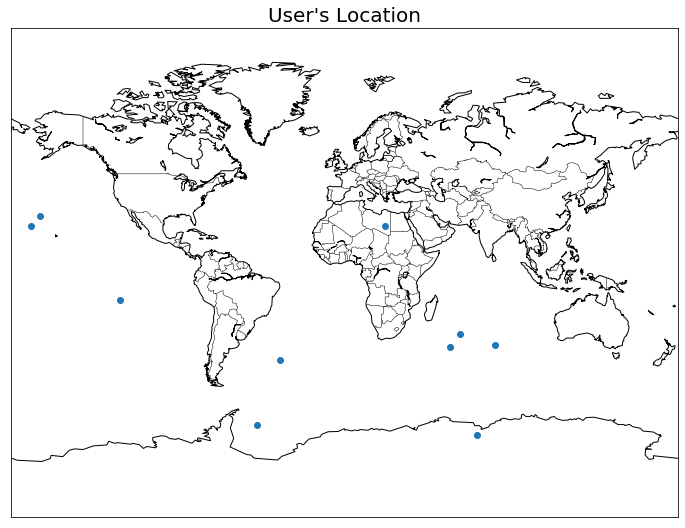

In [7]:
fig = plt.figure(figsize = (12,9))
m = Basemap(projection='mill',
           llcrnrlat =  -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

lon_x = users_dataFrame['Longitude'].tolist()
lat_y = users_dataFrame['Latitude'].tolist()

m.scatter(lon_x, lat_y, latlon=True)

m.drawcoastlines()
m.drawcountries()


#m.drawparallels(np.arange(-90,90,10), labels=[True, False,False,False])
#m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
plt.title("User's Location", fontsize=20)
plt.show()